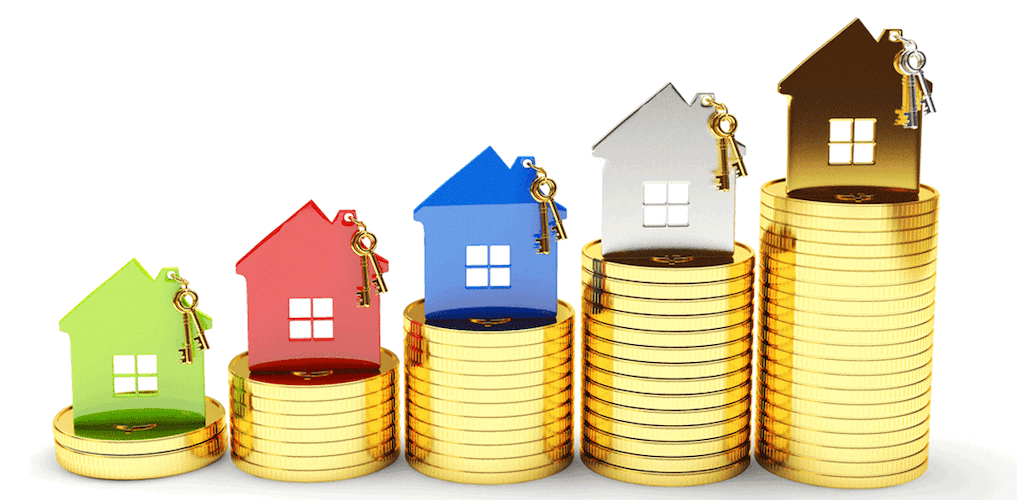

# Importing libraries 🐍

In [1]:
%pip install catboost
%pip install lightgbm
%pip install xgboost


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/b1/35/d63ad9732ab4142aff68718c322b8474022839520bec377a55567dcb590a/catboost-1.2.1.1-cp311-cp311-macosx_11_0_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 386.6 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.7/25.7 MB 800.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/15.6 MB 874.0 kB/s eta 0:00:15^C
   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/15.6 MB 873.6 kB/s eta 0:00:15
ERROR: Operation cancelle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

# Dataset 📁

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
239,4585000,4000,3,1,2,yes,no,no,no,no,1,no,furnished
380,3605000,4500,2,1,1,yes,no,no,no,no,0,no,semi-furnished
286,4235000,2787,3,1,1,yes,no,yes,no,no,0,yes,furnished
455,3129000,5495,3,1,1,yes,no,yes,no,no,0,no,unfurnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
87,6475000,3960,3,1,1,yes,no,yes,no,no,2,no,semi-furnished
436,3290000,2145,3,1,2,yes,no,yes,no,no,0,yes,furnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
136,5740000,5400,4,2,2,yes,no,no,no,yes,2,no,unfurnished
160,5460000,6210,4,1,4,yes,yes,no,no,yes,0,no,furnished


In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.shape # data shape

(545, 13)

In [ ]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.duplicated().sum() # duplicate values check

0

In [ ]:
#df.corr() # correlations between data/

In [ ]:
data=df.copy()

# Data Visualization 📊📈📉

# Bar Plot 📊

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

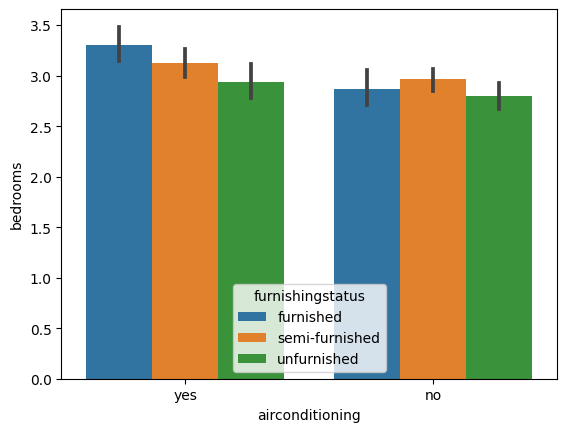

In [ ]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

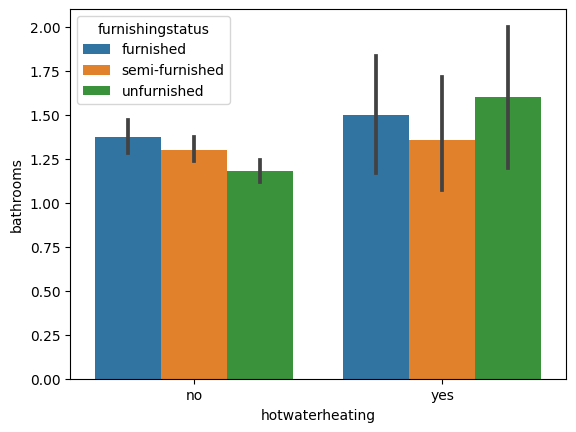

In [ ]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

# Box Plot 📊


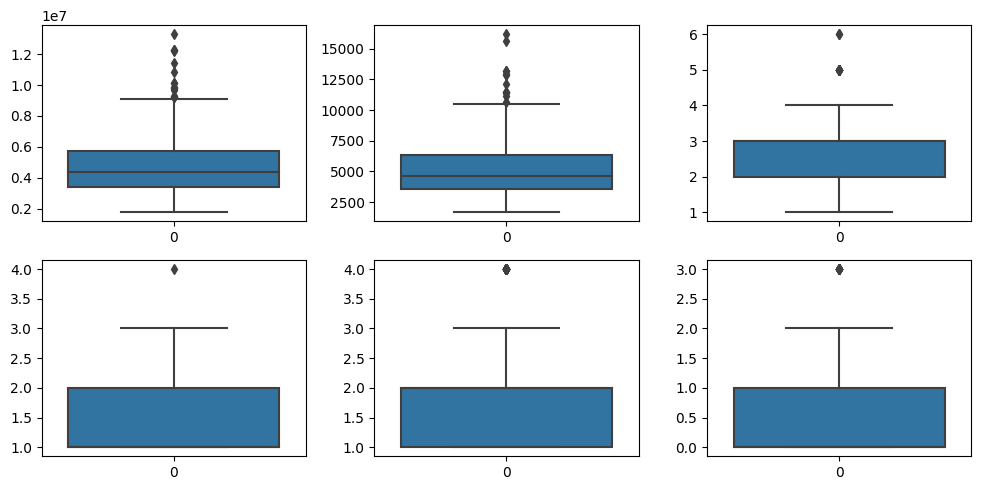

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x2275b8ed8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2275b8ede20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2275b8e04f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2275b8fb3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2275b8fb640>],
 'means': []}

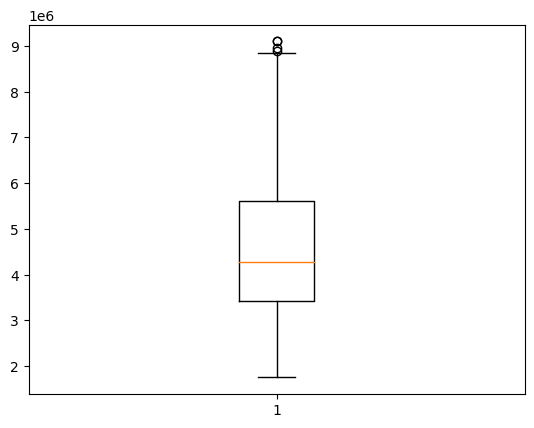

In [ ]:
# Dealing with outliers in price 
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)



{'whiskers': [<matplotlib.lines.Line2D at 0x2274f159610>,
 'caps': [<matplotlib.lines.Line2D at 0x2274f1606d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2274f168040>],
 'medians': [<matplotlib.lines.Line2D at 0x2274f47d430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2274f47d7f0>],
 'means': []}

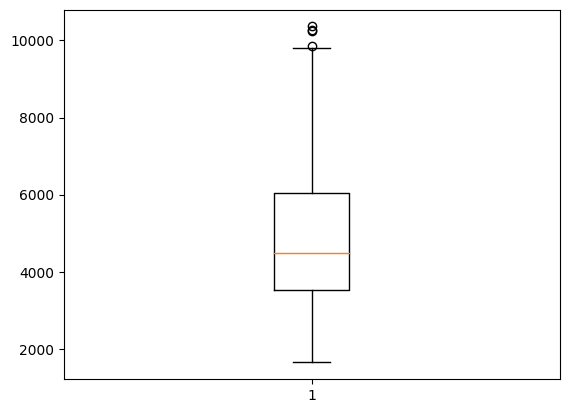

In [ ]:
# Dealing with outliers in srea 

Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)


<Axes: xlabel='furnishingstatus', ylabel='price'>

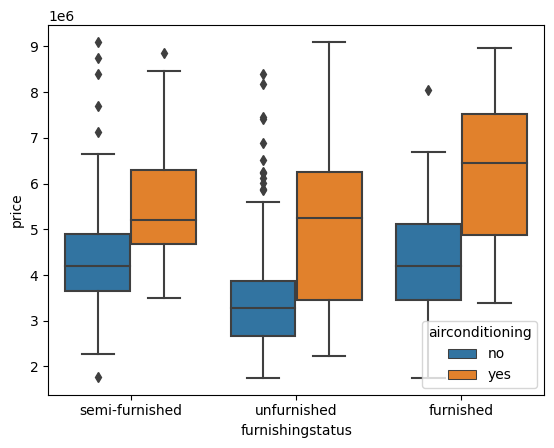

In [ ]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

# Distplot 📊


<Axes: xlabel='bedrooms', ylabel='Density'>

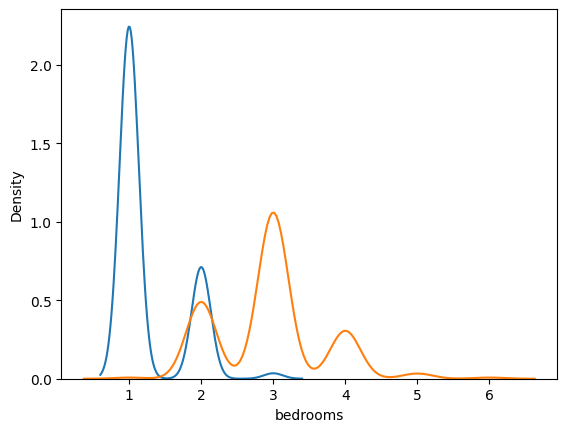

In [ ]:
sns.distplot(df["bathrooms"],hist=False)
sns.distplot(df["bedrooms"],hist=False)

<Axes: xlabel='parking', ylabel='Density'>

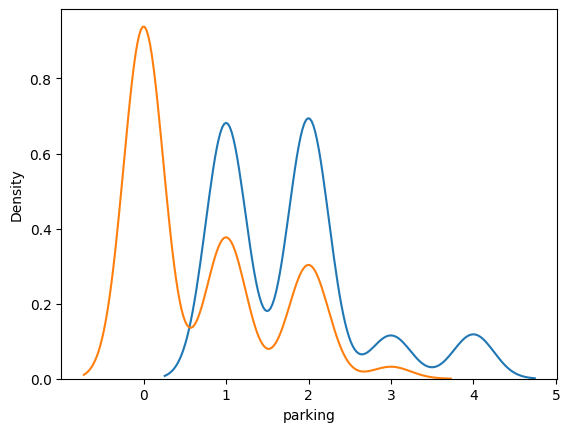

In [ ]:
sns.distplot(df["stories"],hist=False)
sns.distplot(df["parking"],hist=False)

# Heatmap 🌡️

In [ ]:
sns.heatmap(df.corr(), cmap='viridis',annot=True)

# Scatter Plot 📊📈


<Axes: xlabel='area', ylabel='price'>

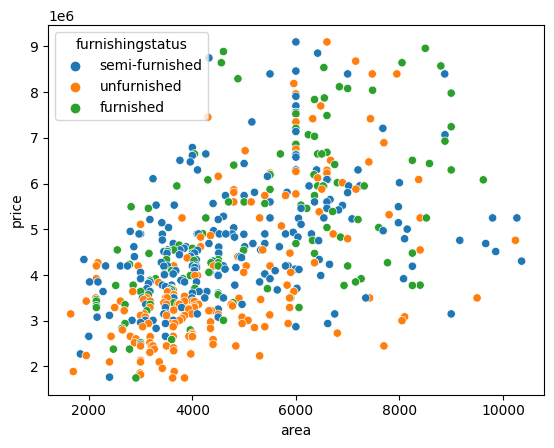

In [ ]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

# Pair Plot 📊📈


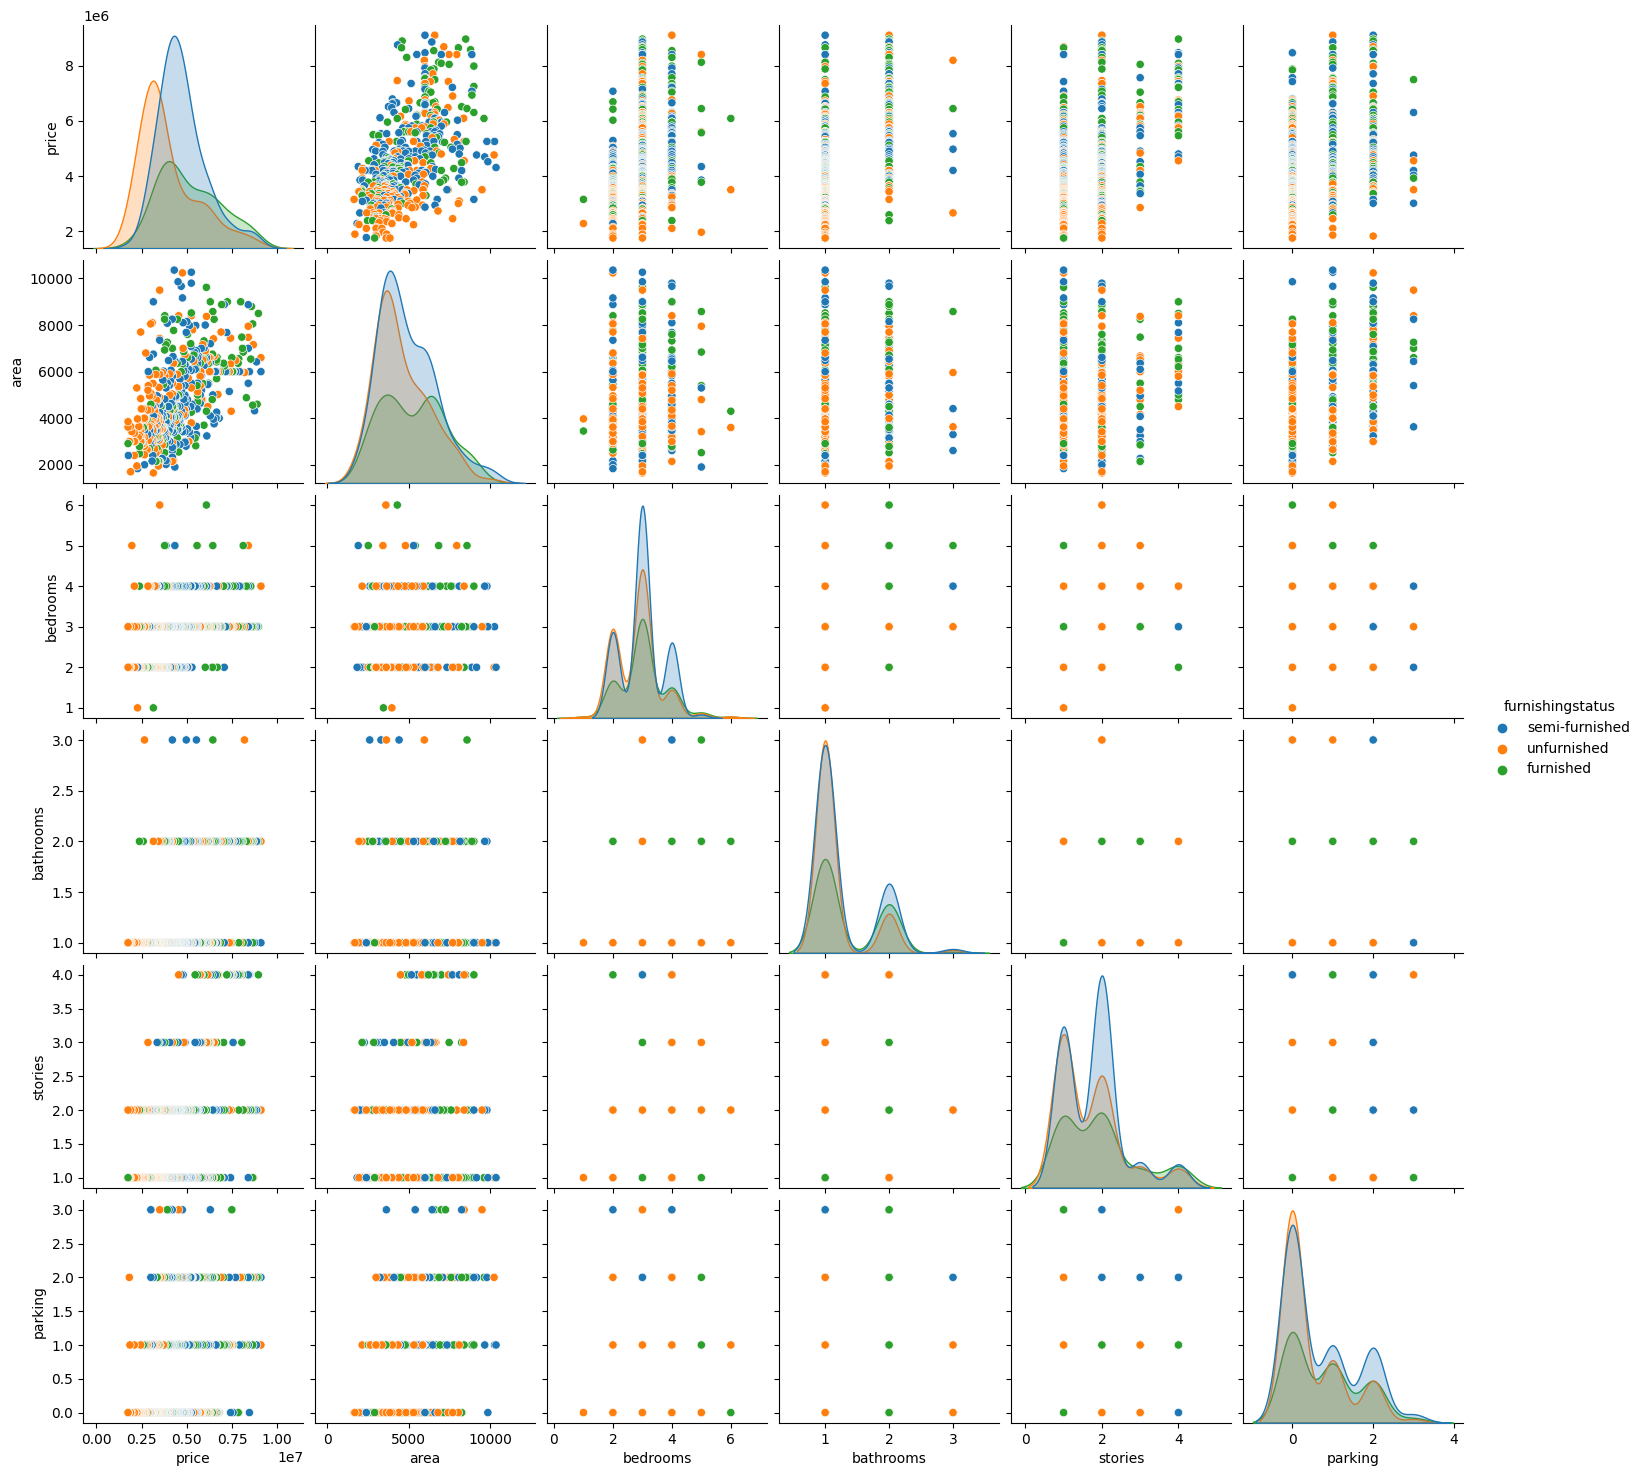

In [ ]:
sns.pairplot(df,hue="furnishingstatus")

# Feature Engineering 🛠️


In [ ]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,False,False,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,False,False,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,True,False,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,False,False,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,False,False,True,True,True,False,True,False


In [ ]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Feature Scaling ⚖️


In [ ]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Training 📈


In [ ]:
model = {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XGBoost' : xgb.XGBRegressor(),            
    'XGRF Regressor' : xgb.XGBRFRegressor(),   
    'Support Vector regressor' : SVR(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge(),
    'LGBM Reg' : LGBMRegressor(),
    'Cat Boost' : CatBoostRegressor(),
    'Linear Regression' : LinearRegression()
}

SyntaxError: invalid syntax (3328519399.py, line 11)

In [ ]:
pred ={}


for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 381, number of used features: 13
[LightGBM] [Info] Start training from score 4762406.272966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

# Models Evaluation 🧪

Results for Random Forest Regressor : 
Mean Square Erroe : 1859233805958.1194
R2 Score : 0.5682617499353457


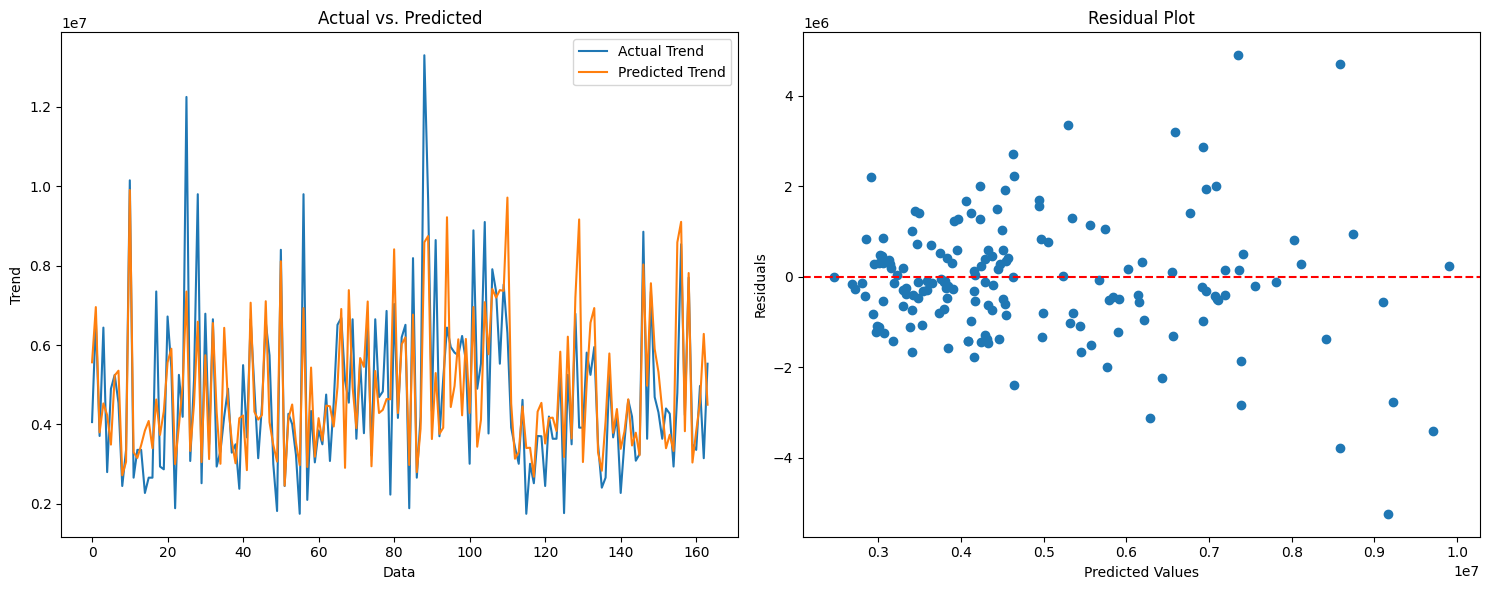

Results for Gradient Boost Regressor : 
Mean Square Erroe : 1587279910365.1238
R2 Score : 0.6314129784711667


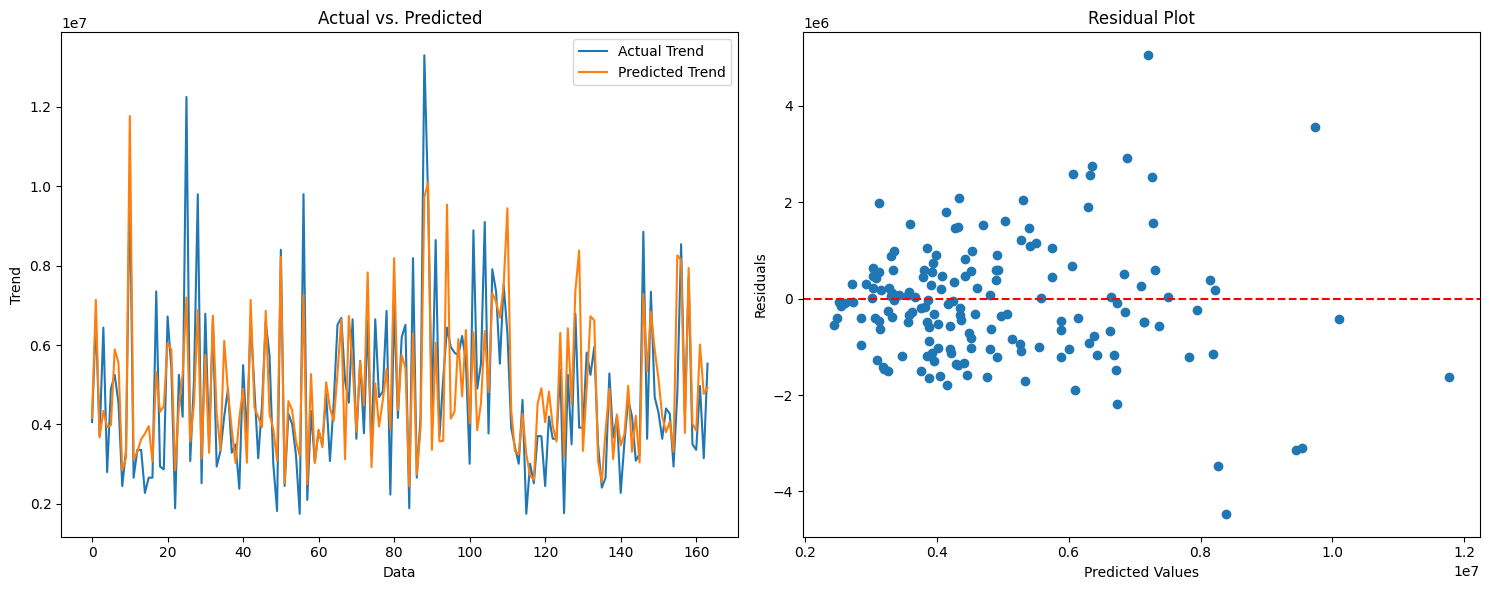

Results for XGBoost : 
Mean Square Erroe : 2085041665999.2249
R2 Score : 0.5158262305119282


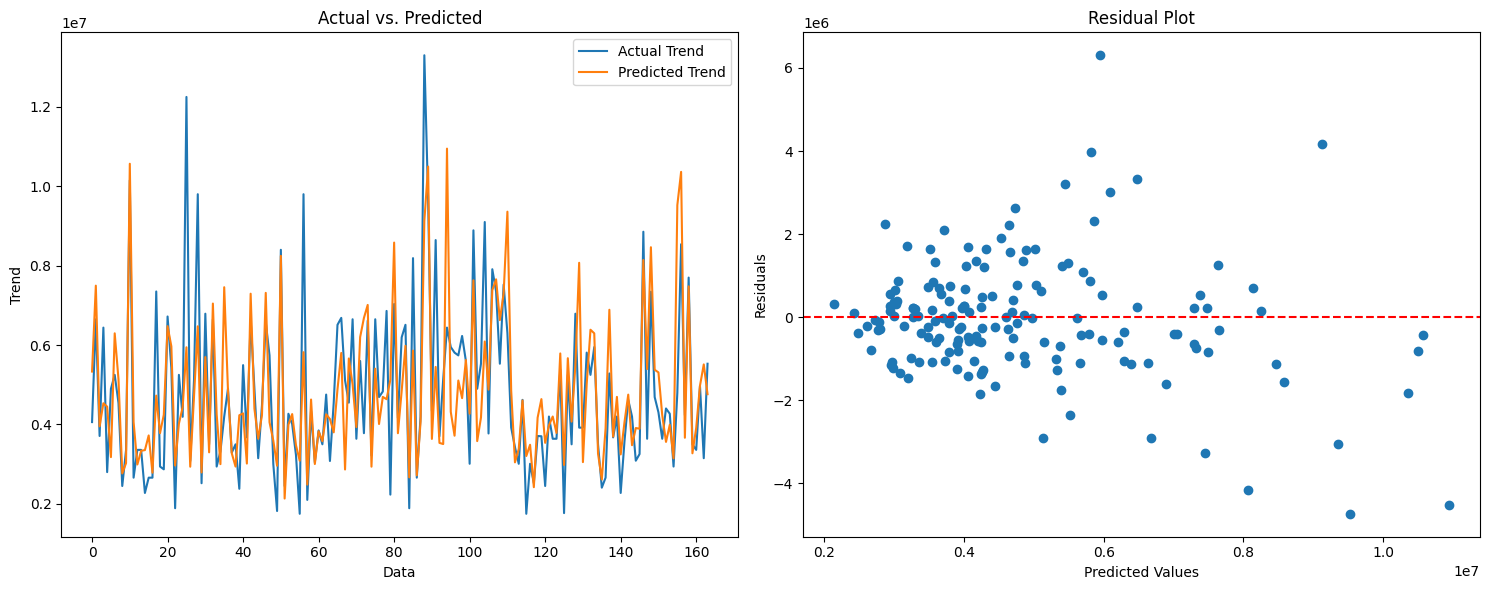

Results for XGRF Regressor : 
Mean Square Erroe : 2097740904480.9404
R2 Score : 0.5128773023127531


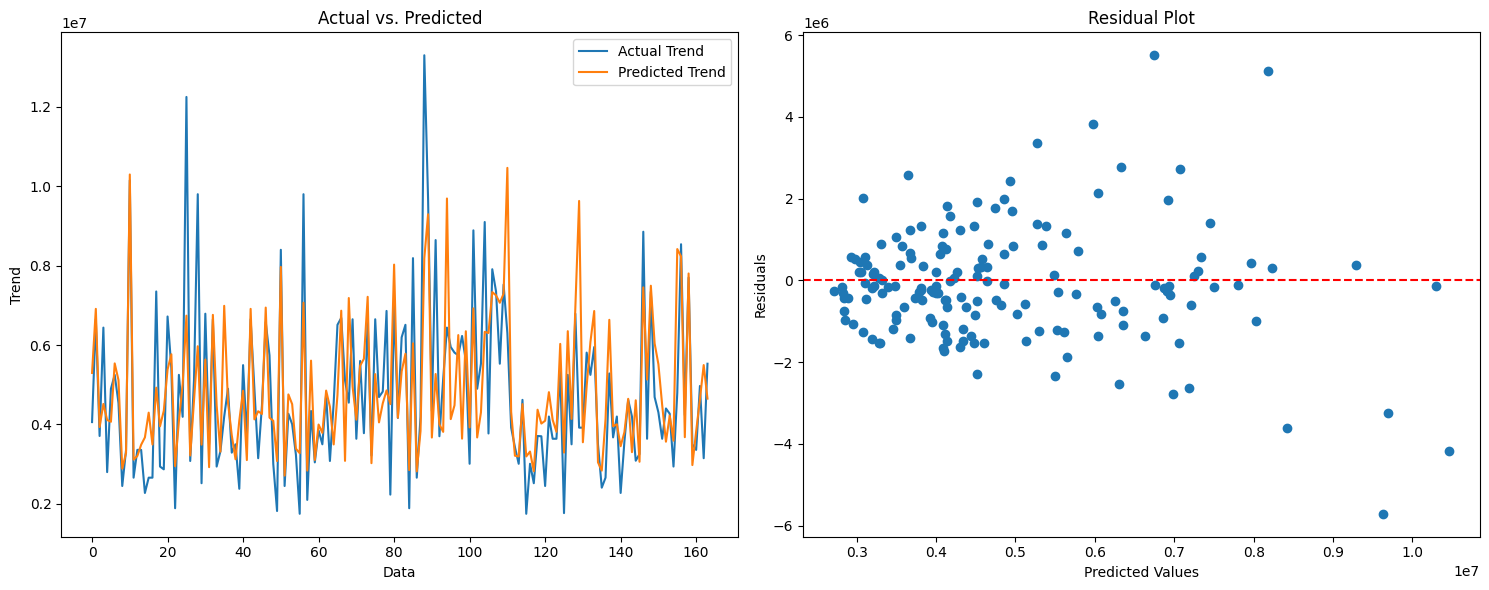

Results for Support Vector regressor : 
Mean Square Erroe : 4462165325262.905
R2 Score : -0.03617277335133684


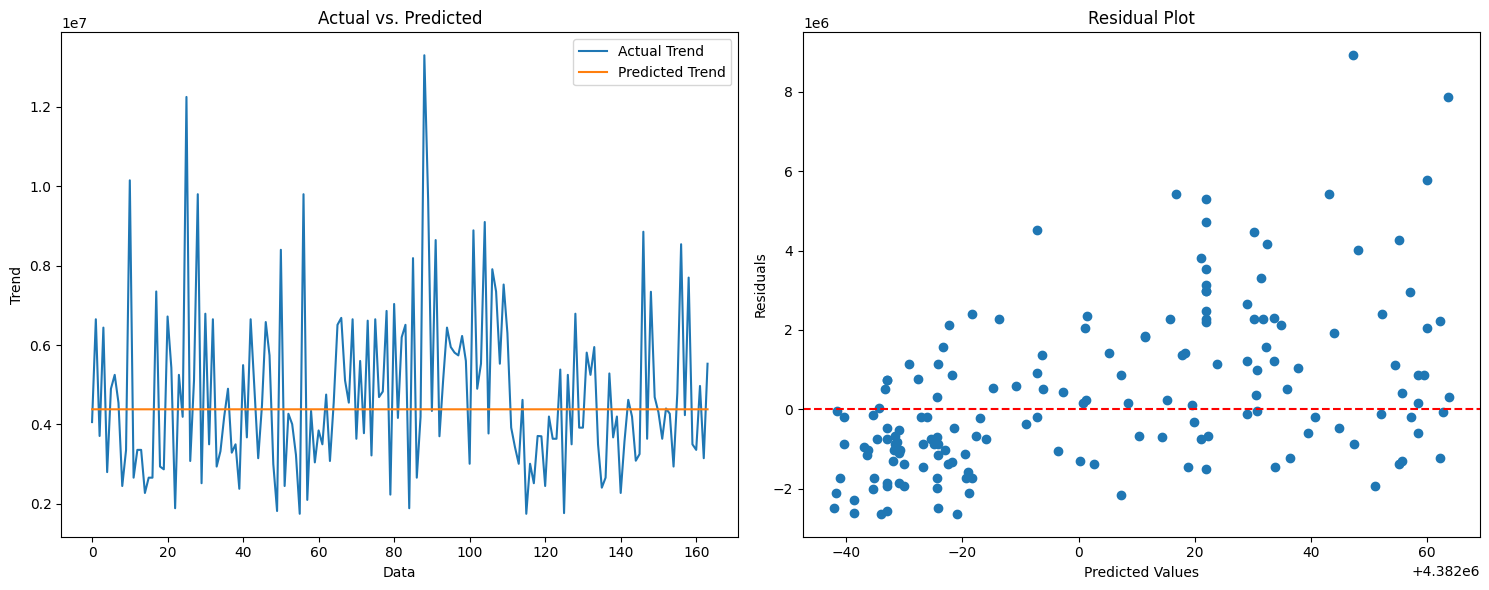

Results for Lasso Reg : 
Mean Square Erroe : 1523021266688.3394
R2 Score : 0.6463346705594011


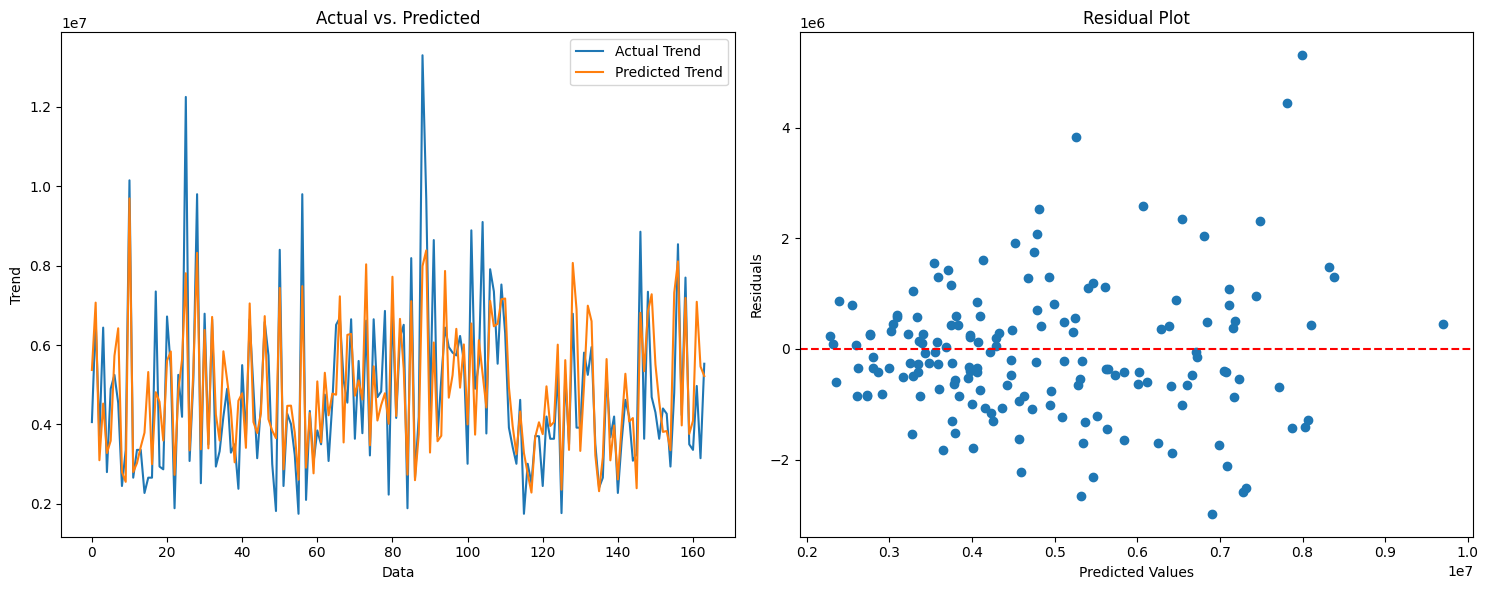

Results for Ridge Reg : 
Mean Square Erroe : 1525354840593.371
R2 Score : 0.6457927843743896


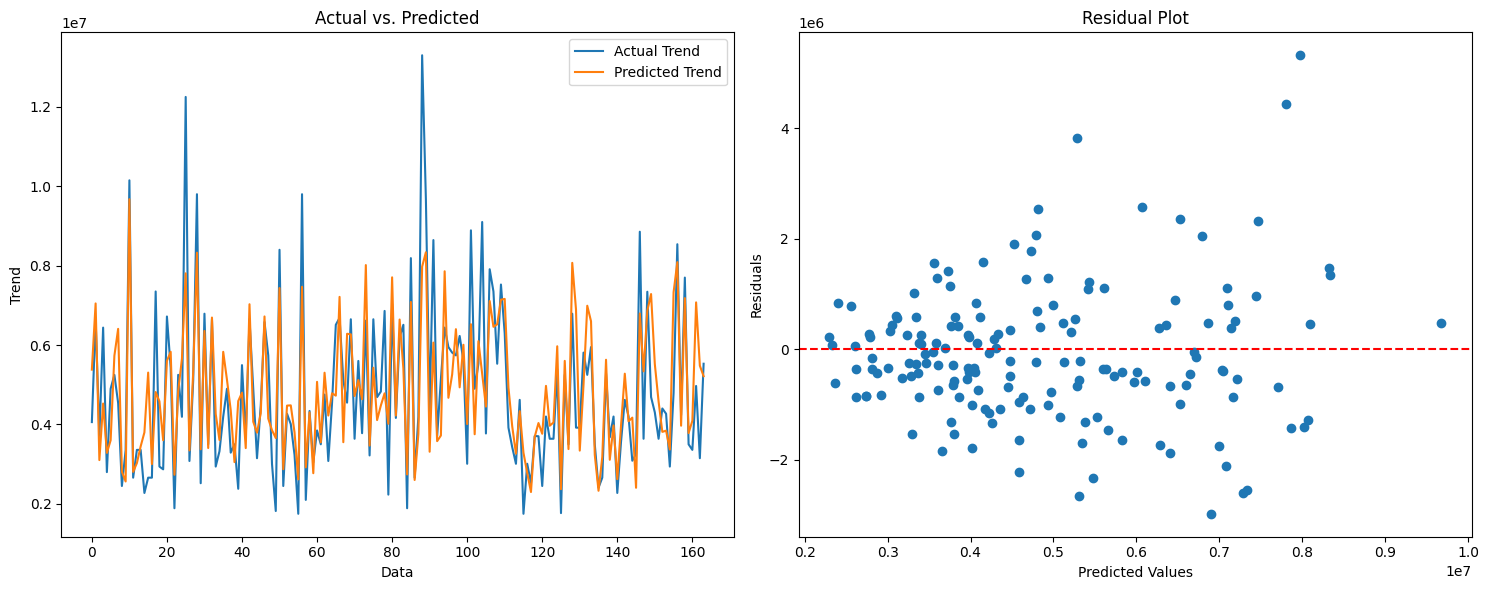

Results for LGBM Reg : 
Mean Square Erroe : 1602977666834.8694
R2 Score : 0.6277677554301107


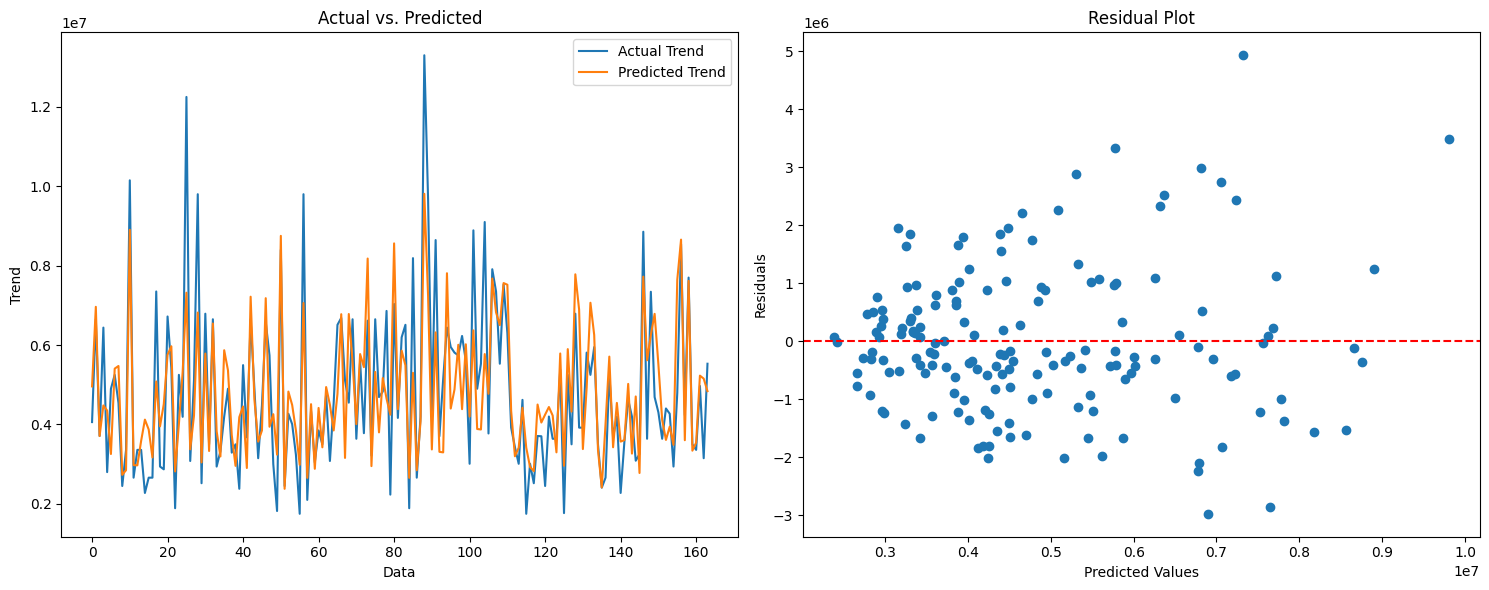

Results for Cat Boost : 
Mean Square Erroe : 1532351539182.4873
R2 Score : 0.6441680600414872


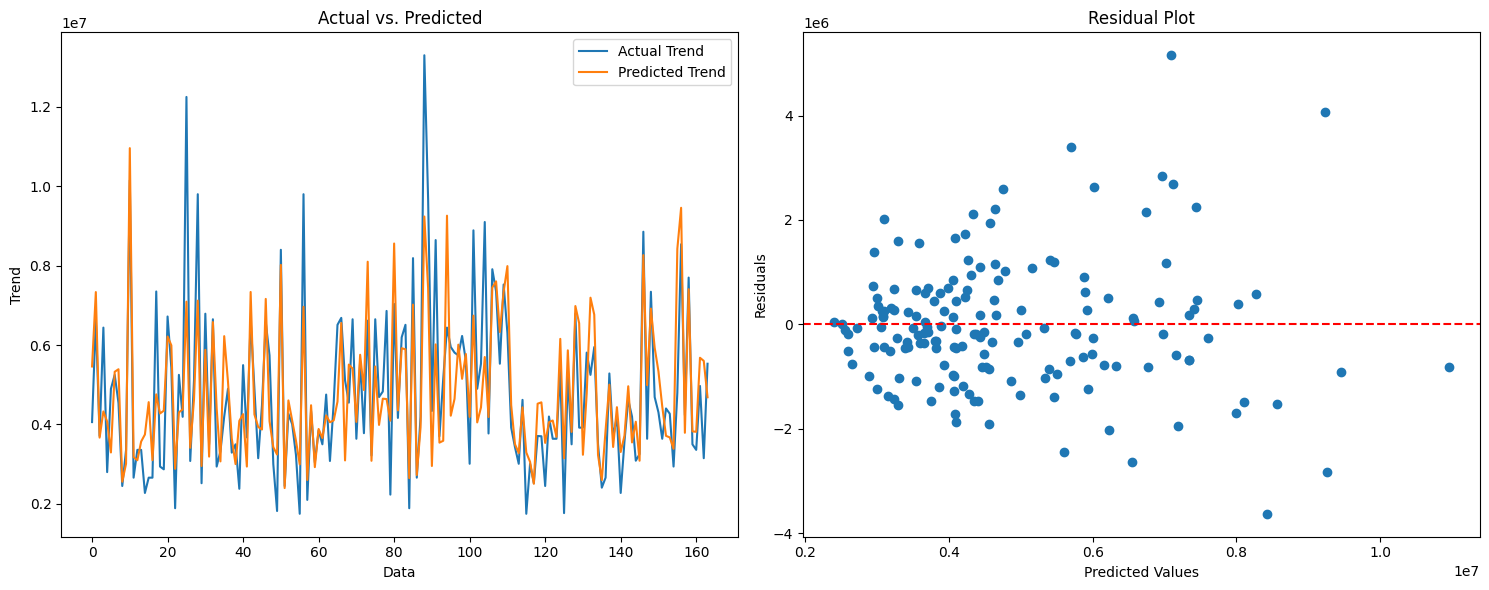

In [ ]:
acc= {} 
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Erroe : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>
    
 * Lasso Reg, Ridge Reg, and Cat Boost models have relatively higher accuracy compared to other models.
 * Support Vector Regressor has a negative accuracy, indicating poor performance. 
 * Random Forest Regressor, XGBoost, and LGBM Reg also have moderate accuracy.

# Accuracy 🎯💯🚀

In [ ]:
data = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
data

,Accuracy
Random Forest Regressor,0.568262
Gradient Boost Regressor,0.631413
XGBoost,0.515826
XGRF Regressor,0.512877
Support Vector regressor,-0.036173
Lasso Reg,0.646335
Ridge Reg,0.645793
LGBM Reg,0.627768
Cat Boost,0.644168


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Inference:</font></h3>

* Random Forest Regressor achieved an accuracy of 0.572596, indicating moderate performance.
* Gradient Boost Regressor performed relatively better with an accuracy of 0.631541.
* XGBoost showed comparable performance with an accuracy of 0.615472.
* XGRF Regressor had the lowest accuracy among the models at 0.516562.
* Support Vector Regressor had a negative accuracy of -0.036173, indicating poor performance on the given regression problem.
* Lasso Reg showed **good performance** with an accuracy of 0.646335.
* Ridge Reg achieved a **similar accuracy** of 0.645793, indicating its effectiveness in the regression task.
* LGBM Reg performed well with an accuracy of 0.627768.
* Cat Boost also showed **promising results** with an accuracy of 0.644168.
